In [1]:
# Dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
def softmax(h):
    return np.exp(h) / (np.sum(np.exp(h), axis = 1, keepdims =True))

def sigmoid(H):
    return 1/(1 + np.exp(-H))

def cross_entropy(y, p):
    return  -np.sum(y*np.log(p))

def accuracy(y, p):
    return np.mean(y == P.argmax(axis = 1))

def feed_forward(X,W1,b1,W2,b2,W3,b3,W4,b4,W5,b5):
    Z1 = np.tanh(np.matmul(X,W1)+b1)
    Z2 = sigmoid(np.matmul(Z1,W2) + b2)
    Z3 = np.tanh(np.matmul(Z2,W3) + b3)
    Z4 = sigmoid(np.matmul(Z3,W4) + b4)
    
    #for classiscastion 
    P = softmax(np.matmul(Z4,W5)+ b5)
    return Z1 ,Z2 ,Z3 ,Z4 , P

def ReLU(h):
    #return np.maximum(h, 0)
    return h*(h>0)
    
def D_ReLU(h):
    #return np.maximum(h, 0)/h
    return (h>0)

def Leaky_ReLU(h,c):
    return h*(h>0) + c*h*(h<0)
    
def D_Leaky_ReLU(h,c):
     return h*(h>0) + c*(h<0)

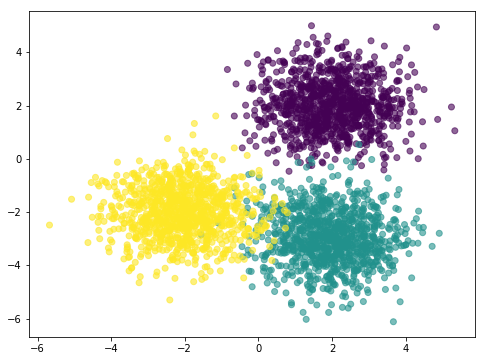

In [4]:
D = 2
K = 3
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([2,-3])
X2 = np.random.randn((N//K),D) + np.array([-2,-2])
X = np.vstack((X0, X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.6)

In [5]:
Y = pd.get_dummies(y)
Y = np.array(Y)

Accyracy: 0.8956666666666667


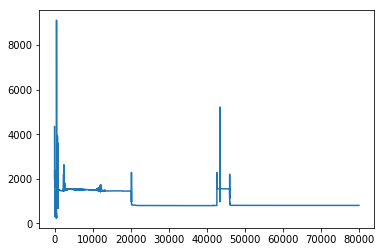

In [50]:
M1 = 4
M2 = 4
M3 = 4
M4 = 4

W1 = np.random.randn(X.shape[1],M1)
b1 = np.random.randn(M1)
W2 = np.random.randn(M1,M2)
b2 = np.random.randn(M2)
W3 = np.random.randn(M2,M3)
b3 = np.random.randn(M3)
W4 = np.random.randn(M3,M4)
b4 = np.random.randn(M4)
W5 = np.random.randn(M4,Y.shape[1])
b5 = np.random.randn(Y.shape[1])

J = []

eta = 5e-4

epochs= int(8e4)

for epoch in range (epochs):
    Z1,Z2,Z3,Z4,P = feed_forward(X,W1,b1,W2,b2,W3,b3,W4,b4,W5,b5)
    
    #classication
    J.append(cross_entropy(Y,P))
    
    dH5 = P -Y
    dW5 = np.matmul(Z4.T,dH5)
    W5 -= eta*dW5
    b5 -= eta*dH5.sum(axis=0)
    
    dZ4 = np.matmul(dH5,W5.T)
    #using sigmoid
    dH4 = dZ4*Z4*(1-Z4)
    dW4 = np.matmul(Z3.T,dH4)
    W4 -= eta*dW4
    b4 -= eta*dH4.sum(axis=0)
    
    dZ3 = np.matmul(dH4,W4.T)
    #using softmax
    dH3 = dZ3*(1-Z3*Z3)
    dW3 = np.matmul(Z2.T,dH3)
    W3 -= eta*dW3
    b3 -= eta*dH3.sum(axis=0)
    
    dZ2 = np.matmul(dH3,W3.T)
    #using sigmoid
    dH2 = dZ2*Z2*(1-Z2)
    dW2 = np.matmul(Z1.T,dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis=0)
    dZ3 = np.matmul(dH4,W4.T)
    
    dZ1 = np.matmul(dH2,W2.T)
    #using softmax
    dH1 = dZ1*(1-Z1*Z1)
    dW1 = np.matmul(X.T,dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis=0)
    
plt.plot(J)

print("Accyracy: {}".format(accuracy(y,P)))